In [57]:
from konlpy.tag import Okt
import numpy as np
import os, re, kss
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from math import log
import pandas as pd
from hanspell import spell_checker

DATA_PATH = './label_0_2.csv'
encoding = 'CP949'
print("File Size: "+str(round(os.path.getsize(DATA_PATH)/1000000, 2))+"MB")

dataset = pd.read_csv(DATA_PATH, header=0, encoding=encoding)
dataset.describe()

File Size: 0.21MB


,1
count,454.000000
mean,0.416300
std,0.493488
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


학습 데이터 전체 개수: 454
문장 길이 최댓값: 2113
문장 길이 최솟값: 6
문장 길이 평균값: 263.50
문장 길이 표준편차: 261.05
문장 길이 중간값: 181.0


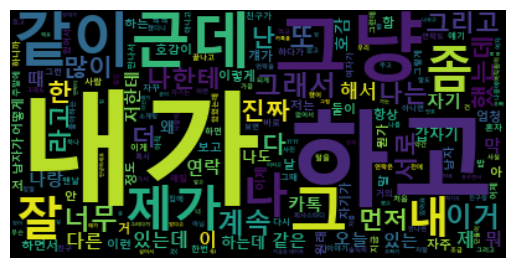

썸인 데이터셋 개수: 189
썸이 아닌 데이터셋 개수: 265


In [2]:
print('학습 데이터 전체 개수: {}'.format(len(dataset)))

# 문장 전체길이 확인
dataset_length = dataset['0'].astype(str).apply(len)
# 문장 통계
print('문장 길이 최댓값: {}'.format(np.max(dataset_length)))
print('문장 길이 최솟값: {}'.format(np.min(dataset_length)))
print('문장 길이 평균값: {:.2f}'.format(np.mean(dataset_length)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(dataset_length)))
print('문장 길이 중간값: {}'.format(np.median(dataset_length)))

from wordcloud import WordCloud
data_sent = [sent for sent in dataset['0'] if type(sent) is str]
wordcloud = WordCloud(font_path = './malgunbd.ttf').generate(' '.join(data_sent))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

print('썸인 데이터셋 개수: {}'.format(dataset['1'].value_counts()[1]))
print('썸이 아닌 데이터셋 개수: {}'.format(dataset['1'].value_counts()[0]))

In [3]:
okt = Okt()

stop_word = pd.read_csv('./ko_stopword_2.txt',sep="\n")
stop_word = pd.DataFrame(stop_word)
stop_words = stop_word.to_numpy()

In [9]:
def preprocessing(text, okt, re_stopword = True):
    spelled_sent = spell_checker.check(text)
    hanspell_sent = spelled_sent.checked
    retext_1 = re.sub("[a-zA-Zㄱ-ㅎㅏ-ㅣ""''!?.]", "", hanspell_sent)
    retext_2 = okt.morphs(retext_1, stem=False)
    
    if re_stopword:
        clean_text = [token for token in retext_2 if not token in stop_words]
    
    clean_text = ' '.join(clean_text)
    return clean_text

In [25]:
import random
import pickle

wordnet = {}
with open("wordnet.pickle", "rb") as f:
    wordnet = pickle.load(f)

########################################################################
# Random swap
# Randomly swap two words in the sentence n times
########################################################################
def random_swap(words, n):
    new_words = words.copy()
    for _ in range(n):
        new_words = swap_word(new_words)

    return new_words

def swap_word(new_words):
    random_idx_1 = random.randint(0, len(new_words)-1)
    random_idx_2 = random_idx_1
    counter = 0

    while random_idx_2 == random_idx_1:
        random_idx_2 = random.randint(0, len(new_words)-1)
        counter += 1
        if counter > 3:
            return new_words

    new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1]
    return new_words

def EDA(sentence, alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=16):
    words = sentence.split(' ')
    words = [word for word in words if word is not ""]
    num_words = len(words)

    augmented_sentences = []
    num_new_per_technique = int(num_aug/4) + 1

    n_rs = max(1, int(alpha_rs*num_words))
    
    # rs
    for _ in range(num_new_per_technique):
        a_words = random_swap(words, n_rs)
        augmented_sentences.append(" ".join(a_words))
    random.shuffle(augmented_sentences)

    if num_aug >= 1:
        augmented_sentences = augmented_sentences[:num_aug]
    else:
        keep_prob = num_aug / len(augmented_sentences)
        augmented_sentences = [s for s in augmented_sentences if random.uniform(0, 1) < keep_prob]

    augmented_sentences.append(sentence)

    return augmented_sentences

In [39]:
clean_sent = []
for re_text in dataset['0']:
    if type(re_text) == str:
        print('start')
        clean_text=''
        for sent in kss.split_sentences(re_text):
            clean_text += preprocessing(sent, okt) + ' '
        clean_text = clean_text[:-1]
#         eda_sent = EDA(clean_text)
#         for n in range(0, 6):
#             clean_sent.append([eda_sent[n]])
    else:
        clean_sent.append([])
    print('end')
    print('===========================================')

start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end


end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start


end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start
end
start


In [20]:
label_set = []
for n in dataset['1']:
    for _ in range(0, 6):
        label_set.append(n)

In [21]:
clean_train_df = pd.DataFrame({'txt': clean_sent, 'result':label_set})
clean_train_df.to_csv('./cleanDB_stem_false_aug.csv', index=False, encoding='utf-8-sig')

In [43]:
word_index = []
for sent in clean_sent:
    word_to_index = {word: index for index, word in enumerate(sent)}
    word_index.append(word_to_index)
print(word_index[0])

{'나': 0, ' ': 102, '유': 2, '치': 3, '원': 4, '때': 6, '잠': 8, '깐': 9, '사': 11, '물': 12, '함': 13, '뒤': 15, '쪽': 16, '에': 94, '뭐': 20, '좀': 22, '넣': 24, '다': 104, '문': 27, '을': 29, '탁': 31, '닫': 33, '하': 89, '남': 39, '자': 40, '애': 42, '가': 103, '있': 45, '거': 48, '야': 49, '그': 57, '리': 52, '고': 87, '날': 55, '윽': 59, '게': 63, '보': 65, '더': 66, '니': 68, '”': 84, '이': 72, '것': 74, '만': 76, '은': 77, '잊': 79, '마': 82, '라': 86, '볼': 92, '뽀': 97, '해': 99, '주': 100}


In [84]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
encoded = tokenizer.texts_to_sequences(clean_sent)

In [85]:
padded = pad_sequences(encoded, padding='post', maxlen = max(len(item) for item in encoded))
type(padded)
padded.shape

(454, 466)

In [86]:
# np.savetxt("clean_db.csv", padded, delimiter=",", fmt="%d")

# Change data type from Numpy to Pandas
padded_df = pd.DataFrame(padded)
padded_df.to_csv('./clean_db.csv', index=False, encoding='utf-8-sig')

In [63]:
# TF-IDF

train_db = pd.read_csv('./cleanDB_stem_false.csv', header=0)

N = len(dataset)

vocab = list(set(w for doc in train_db['txt'] for w in doc.split()))
vocab.sort()

def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in train_db['txt']:
        df += t in doc
    return log(N/(df+1))

def tfidf(t, d):
    return tf(t, d)*idf(t)
        
result = []

for i in range(N):
    result.append([])
    d = train_db['txt'][i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tfidf(t, d))
    
tf_ = pd.DataFrame(result, columns = vocab)


KeyboardInterrupt: 

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

train_db = pd.read_csv('./cleanDB_stem_false.csv', header=0)

vector = CountVectorizer()
print(vector.fit_transform(train_db['txt']).toarray())
print(vector.vocabulary_)



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'유치원': 4670, '사물함': 3176, '뒤쪽': 1733, '넣어놓고': 1196, '닫으니까': 1420, '남자': 1091, '애가': 4046, '있는': 4984, '보더': 2836, '만은': 2115, '잊지': 5055, '뽀뽀': 3121, '해주고': 6492, '갔어': 269, '맨날': 2233, '전화하고': 5272, '한창': 6421, '대던': 1487, '남있었거든': 1090, '그러다가': 682, '있었는데': 5016, '우산': 4579, '없어서': 4221, '친구': 5923, '맞고': 2191, '뛰어왔어': 1929, '하다가': 6312, '맞았다고': 2208, '얘기': 4080, '하니까': 6311, '전화': 5270, '와서': 4505, '엄청': 4184, '걱정': 368, '하는': 6302, '말투': 2176, '맞으면': 2209, '되는데': 1674, '감기': 244, '걸리면': 401, '어떡해': 4102, '부르지': 2972, '이러는': 4745, '부른다고': 2974, '오겠어': 4412, '이러고': 4740, '있었지': 5031, '며칠': 2328, '있다가': 4991, '왔거든': 4520, '학원': 6387, '이었는데': 4838, '걸어서': 415, '15분': 25, '거리': 353, '여서': 4287, '어떡하나': 4099, '고민': 505, '끝나고': 920, '나오니까': 1008, '들고': 1773, '기다리고': 766, '있었다': 5019, '끝나는': 922, '알았냐고': 4030, '했더니': 6549, '같은': 323, '수업': 3480, '듣는': 1770, '되게': 1664, '